<a href="https://colab.research.google.com/github/IevaRadaviciute/obsidian-translations/blob/master/Python_Lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Programavimo įvado pratybos

- Python komandoms prisiminti: ``https://www.w3schools.com/python/``
- Naudingos Powershell komandos:

    - `ls` - pažiūrėti katalogo turinį

    - `md` - sukurti naują katalogą

    - `cd` - pereiti į katalogą / iš katalogo

    - `ni p5.py` - sukuria naują bylą vardu `p5.py`

    - `python p5.py` - kompiliuoja Python programą

# A1 (Studijų įgūdžiai, OriginLab - 2 darbas):

Atvaizduokite pateikto failo `2_uzduotis.csv` duomenis dvigubu grafiku:

* Grafikuose duomenis atvaizduokite taškais, pasinaudodami [`ax.scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html).
* Pateiktas kodas sukuria du grafikus vienas šalia kito su bendra `y` ašimi. Modifikuokite kodą, kad grafikai būtų vienas virš kito.
```
fig, axs = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={"wspace":0}, sharey=True)
```
Grafikų išdėstymo tinkleliu nustatymus galite rasti [`gridspec`](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html) dokumentacijoje.
* Visus kitus apipavidalinimus parinkite tokius kaip pateiktame paveiksliuke.
* Naudingos funkcijos [`ax.set_xticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html) ir [`ax.minorticks_on()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.minorticks_on.html).

Įvykdę užduotį turite gauti tokį [grafiką](https://arnas.tfai.vu.lt/examples/matplotlib_2.png)

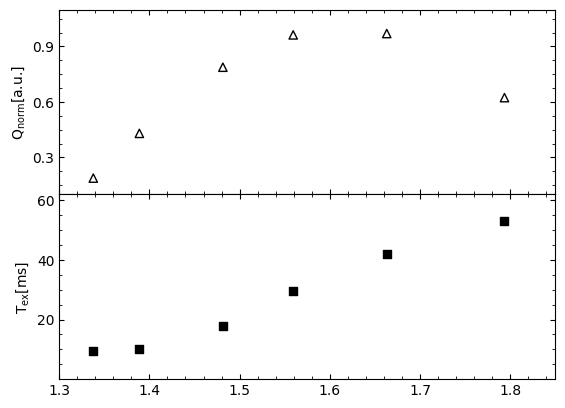

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

data = np.genfromtxt("2_uzduotis.csv")
x = data[:,0]
y1 = data[:,1]
y2 = data[:,2]

fig, axs = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={"hspace": 0}, sharex=True)   #"h" - horizontal, sharex = True leidžia dalintis X argumentu
axs[0].scatter(x, y2, marker="^",  color='none', edgecolor = "black")
axs[0].set(ylim = (0.1, 1.1))
axs[0].set_yticks([0.3, 0.6, 0.9])                                                      #nustatomi x ir y asiu diapozonai, kad atitiktu pavyzdi
axs[0].set(ylabel = r"Q$_\mathrm{norm}$[a.u.]")                                         #mathrm nuima pasvirima nuo latex teksto
axs[0].tick_params(which = "both", direction = "in", right = True, top = True)
axs[0].minorticks_on()

axs[1].scatter(x, y1, marker="s", color='black')
axs[1].set(ylim = (0, 62), xlim = (1.3, 1.85))
axs[1].set_yticks([20, 40, 60])                                                         #nustatomi x ir y asiu diapozonai, kad atitiktu pavyzdi
axs[1].set(ylabel = r"T$_\mathrm{ex}$[ms]")                                             #mathrm nuima pasvirima nuo latex teksto
axs[1].tick_params(which = "both", direction = "in", right = True, top = True)
axs[1].minorticks_on()

#for ax in axs:
#  axs[ax].tick_params(which = "both", direction = "in", right = True, top = True)
#  axs[ax].minorticks_on()

plt.show()


# A2
[Sierpiński trikampis](https://en.wikipedia.org/wiki/Sierpi\%C5\%84ski\_triangle) yra fraktalinė aibė turinti lygiakraščio trikampio, rekursyviai padalinto į mažesnius lygiakraščius trikampius, formą. Ši aibė pavadinta lenkų matematiko Wacławo Sierpińskio vardu, tačiau, kaip dekoratyvinis raštas, žinoma daugelį amžių anksčiau.

Sierpiński aibę galima aproksimuoti tokiu algoritmu:

1. Pasirinktie tris taškus plokštumoje: $p_1$, $p_2$ ir $p_3$. Jie bus trikampio viršūnės. Taškai aprašomi (x, y) koordinatėmis. Sukurkite tris pradinius taškus.

```
p_1 = (0, 0)
...
```

2. Pasirinkite atsitiktinį tašką ant vienos iš trikampio kraštinių. Pavyzdžiui, raskite vidurio taška $v_1$ tarp bet kurių dviejų trikampio viršūnių. Pavadinkite šį tašką `pradzia`.
   * Pasirinkite atsitiktinai dvi iš trijų viršūnių, panaudokite `random` modulį ir funkciją [`random.sample()`](https://www.w3schools.com/python/ref_random_sample.asp). Apskaičiuokite vidurio tašką tarp šių dviejų koordinačių.

```
import random
pasirinkimas1, pasirinkimas2 = random.sample([pasirinkimu_sarasas], 2)

```


3. Atsitiktiniu būdų pasirinkite vieną iš trijų trikampio višūnių, $p_{r_1}$, kur $r_1\in \{1, 2, 3\}$, ir pavadinkite ją `pabaiga`.

    * Vėl pasinaudokite `random.sample()` funkcija.

4. Suraskite vidurio tašką $v_2$ tarp pradžios ir pabaigos, t.y. $v_2 = \frac12(v_1 + p_{r_1})$.

5. Kartokite 3 ir 4 žingsnius.
    
$v_1,\;\; v_2 =  \tfrac12(v_1 + p_{r_1}),\;\; v_3 =  \tfrac12(v_2 + p_{r_2}) , \;\; \ldots, \;\; v_{\infty}$

kur $r_1, r_2, \ldots \in \{ 1, 2, 3\}$ yra atsitiktinai parinkti, tankiai užpildo Sierpiński aibę.

<br>


## Užduotys:

* Parašykite funkciją rasti vidurio taškui tarp dviejų pateiktų koordinačių:
```
def vidurys(koord1, koord2):
  ...
  return [x_v, y_v]           # vidurio taško koordinatės
```
* Apsibrėžkite tris trikampio viršūnes koordinatėmis. Naudokite sąrašus `[x, y]`.
* Pasinaudoję `random` moduliu, pasirinkite du trikampio kampus.
* Susikurkite kintamąjį `pradzia`, kurio koordinates apskaičiuosite su pradžioje apsirašyta funkcija - vidurys tarp dviejų trikampio viršūnių.
* Pasinaudokite moduliu `random` ir priskirkite kintamajam `pabaiga` vieną iš trijų trikampio viršūnių.
* Raskite vidurio tašką tarp `pradžia` ir `pabaiga`. Tašką saugokite kažkokiame taškų sąraše.
* Vidurio taškas tampa naujuoju pradžios tašku, o naują pabaigos tašką pasirenkame atsitiktinai iš trijų trikampio viršūnių.
* Viską įvelkame į `for` ciklą, kurį kartojame 100, 1000 ar 10000 kartų, atnaujindami grafiką. Atvaizduokite tik kas tam tikrą iteraciją (pvz kas 100, kas 1000, kas 2000 ir pan.). Google colab turi [problemų](https://stackoverflow.com/questions/63794302/plot-inside-a-loop-with-google-colabs) atvaizduoti kiekvienąkart pridedant tašką. Tam jums reikės importuoti du modulius:
```
from IPython import display
from time import sleep
```
Tuomet atvaizdavimas atrodys taip:
```

fig, ax = plt.subplots()

for i in range(iteraciju):
  if i % (iteraciju//50) ==0:       #Kas 2% iteracijų - atvaizduojame grafiką.
    ax.scatter ...
    ...
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(0.5)
  
  #šioje vietoje atsitiktinai pasirenkame taškus, apskaičiuojame vidurio koordinates, pridedame tašką prie turimo sąrašo
  ...
```

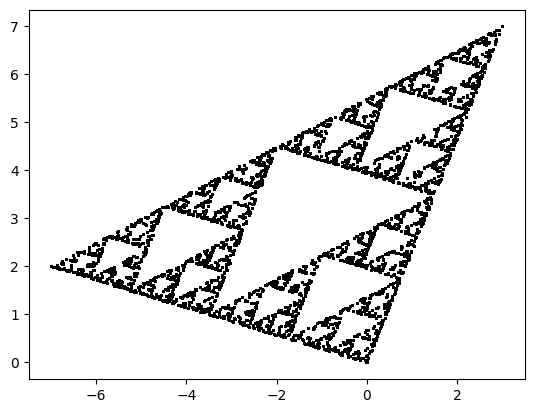

In [95]:
import matplotlib.pyplot as plt
import random
import numpy as np
from IPython import display
from time import sleep

p_1 = [0, 0]                                                        # isrenku trikampio virsuniu koordinates
p_2 = [3, 7]
p_3 = [-7, 2]
taskai = []

fig, ax = plt.subplots()

def vidurys(koord1, koord2):
  x_v = (koord1[0]+koord2[0]) / 2
  y_v = (koord1[1]+koord2[1]) / 2
  return [x_v, y_v]                                                             # vidurio taško koordinatės

pasirinkimas1, pasirinkimas2 = random.sample([p_1, p_2, p_3], 2)
pradzia = vidurys(pasirinkimas1, pasirinkimas2)                                 # isrenkamas pirmasis taskas
pabaiga = random.sample([p_1, p_2, p_3], 1)[0]                                  # isrenkamas pirmasis taskas
v1 = vidurys(pradzia, pabaiga)

taskai = [p_1, p_2, p_3, v1]                                                    # tasku sarasas


for i in range(4000):                                                            # randami taskai
  pradzia = v1
  pabaiga = random.choice([p_1, p_2, p_3])
  v1 = vidurys (pradzia, pabaiga)
  taskai.append(v1)

for i in range(4000):
  if i % (4000//50) == 0:                                                        #Kas 2% iteracijų - atvaizduojame grafiką.
    ax.scatter(np.array(taskai)[:,0], np.array(taskai)[:,1], color="black", s = 1)
    display.display(plt.gcf())
    display.clear_output(wait = True)
    sleep(0.5)
taskai.append(pabaiga)
plt.show()
